In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
path = '../data_files/data/ex2data2.txt'
data2 = pd.read_csv(path,header=None,names=['Microchip 1','Microchip 2','Accepted'])
data2.head()

,Microchip 1,Microchip 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [88]:
data2.describe()

,Microchip 1,Microchip 2,Accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


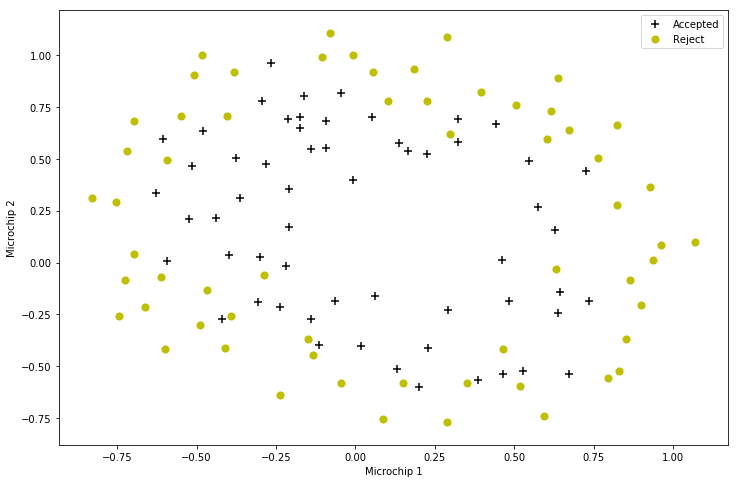

In [89]:
def plot_data():
    positive = data2[data2['Accepted'].isin([1])]
    negative = data2[data2['Accepted'].isin([0])]

    fig, ax = plt.subplots(figsize=(12,8))
    ax.scatter(x = positive['Microchip 1'],y = positive['Microchip 2'],c = 'black', s = 50,marker = '+',label = 'Accepted')
    ax.scatter(x = negative['Microchip 1'],y = negative['Microchip 2'],c = 'y', s = 50,marker = 'o',label = 'Reject')
    ax.legend()
    ax.set_xlabel('Microchip 1')
    ax.set_ylabel('Microchip 2')
#     plt.show()
plot_data()

In [90]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [91]:
def feature_mapping(x1, x2, power,as_ndarray = False):
    data = {}
#     for i in np.arange(power + 1):
#         for p in np.arange(i + 1):
#             data["f{}{}".format(i - p, p)] = np.power(x1, i-p)* np.power(x2,p)
    data = {"f'{}{}".format( i-p , p ):np.power(x1,i-p) * np.power(x2,p)
                    for i in np.arange(power+1)
                    for p in np.arange(i+1)
           }
    if as_ndarray:
        return np.array(pd.DataFrame(data))
    else:
        return pd.DataFrame(data)

In [92]:
x1 = np.array(data2['Microchip 1'])
x2 = np.array(data2['Microchip 2'])

_data2 = feature_mapping(x1, x2, power = 6)
print(_data2.shape)
_data2.head()

(118, 28)


,f'00,f'10,f'01,f'20,f'11,f'02,f'30,f'21,f'12,f'03,...,f'23,f'14,f'05,f'60,f'51,f'42,f'33,f'24,f'15,f'06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [93]:
theta = np.zeros(_data2.shape[1])
X = feature_mapping(x1, x2, power = 6,as_ndarray = True)
print(X.shape)

y = np.array(data2.iloc[:,-1])
print(y.shape)

(118, 28)
(118,)


In [94]:
def regularized_cost(theta, X, y, l=1):
    thetaReg = theta[1:]
    first = ( -y * np.log(sigmoid(X @ theta) ))  - (1-y) * np.log(1-sigmoid( X @ theta ))
    reg = (thetaReg @ thetaReg) * l / ( 2*len(X) )
    return np.mean(first) + reg

regularized_cost(theta,X,y,l=1)

0.6931471805599454

In [95]:
def regularized_gradient(theta, X, y, l=1):
    thetaReg = theta[1:]
    first = ( X.T @ (sigmoid(X @ theta) - y)) / len(X)
#     print(first)
     # 这里人为插入一维0，使得对theta_0不惩罚，方便计算
    reg = np.concatenate([np.array([0]), (l / len(X)) * thetaReg])
#     print(reg)
# [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
#  1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
#  8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
#  1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
#  4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
#  3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
#  4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]
# [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
#  0. 0. 0. 0.]
    return first + reg
np.array([0])

array([0])

In [96]:
regularized_gradient(theta,X,y)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

In [97]:
import scipy.optimize as opt
print('init cost = {}'.format(regularized_cost(theta,X,y)))
#init cost = 0.6931471805599454
res = opt.minimize(fun=regularized_cost,x0=theta,args=(X,y),method='CG',jac=regularized_gradient)
res

init cost = 0.6931471805599454


     fun: 0.5290027310062123
     jac: array([-2.94458943e-07, -1.51972320e-06,  2.34238009e-06,  1.85223250e-06,
       -2.39375675e-06,  4.28895410e-06, -1.35435949e-06,  1.53200325e-06,
       -1.93764599e-07,  7.98286895e-07, -1.50233067e-07, -1.50619590e-06,
        4.86214170e-07, -9.80408224e-07,  1.85534606e-06, -1.27800966e-06,
        7.29815957e-07, -6.57848811e-07,  3.56959000e-07, -2.89443654e-08,
       -2.66044823e-07, -8.48670056e-07, -7.48056830e-07,  1.26070965e-07,
       -6.66924636e-07,  2.79434662e-07, -6.00948390e-07,  2.20284467e-07])
 message: 'Optimization terminated successfully.'
    nfev: 55
     nit: 19
    njev: 55
  status: 0
 success: True
       x: array([ 1.2726322 ,  0.62526851,  1.18110054, -2.01977776, -0.91750968,
       -1.43140105,  0.12396937, -0.36542089, -0.35720349, -0.17516017,
       -1.45817405, -0.05109747, -0.61556197, -0.2747374 , -1.19275643,
       -0.24225813, -0.20594332, -0.0447863 , -0.27777193, -0.29534672,
       -0.45647333, -

In [98]:
import scipy.optimize as opt
print('init cost = {}'.format(regularized_cost(theta,X,y)))
#init cost = 0.6931471805599454
res = opt.minimize(fun=regularized_cost,x0=theta,args=(X,y),method='Newton-CG',jac=regularized_gradient)
res

init cost = 0.6931471805599454


     fun: 0.5290027297130991
     jac: array([-3.43864518e-07, -2.44768778e-09, -9.43718424e-08,  7.79836255e-09,
        1.87847362e-08, -1.48243025e-07,  7.23008737e-09, -2.07295216e-08,
        1.45885028e-08, -5.96590490e-08,  4.78174025e-08,  7.02570207e-09,
        1.74520455e-09,  9.87022512e-09, -3.85778677e-08,  5.16654199e-09,
       -8.00106929e-09,  4.79794277e-09, -4.24227921e-09, -2.47789316e-10,
       -5.50094539e-08,  6.58565485e-09,  1.99445696e-09,  3.68875163e-09,
        4.99319365e-09,  1.05388850e-09,  7.68837046e-09, -2.57083894e-08])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 70
  status: 0
 success: True
       x: array([ 1.27273835,  0.62527067,  1.18108852, -2.0199575 , -0.91742314,
       -1.43166641,  0.12400638, -0.36553539, -0.35723822, -0.17513013,
       -1.45815177, -0.0509885 , -0.61555352, -0.27470598, -1.19281307,
       -0.24218856, -0.20600664, -0.04473034, -0.27778426, -0.29537844,
       -0.4

In [99]:
def predict(theta, X):
    probability = sigmoid( X @ theta)
    return [1 if x >= 0.5 else 0 for x in probability]  # return a list

In [100]:
from sklearn.metrics import classification_report

final_theta = res.x
y_predict = predict(final_theta, X)
predict(final_theta, X)
print(classification_report(y,y_predict))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        60
           1       0.78      0.91      0.84        58

    accuracy                           0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.84      0.83      0.83       118



(-0.8, 1.2)

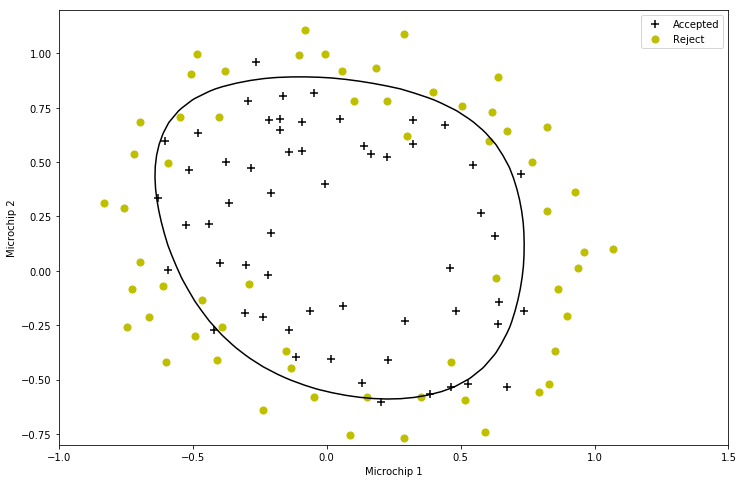

In [138]:
x = np.linspace(-1, 1.5, 50)
# print(x)
#从-1到1.5等间距取出50个数
xx, yy = np.meshgrid(x, x)
# print(np.meshgrid(x,x))
# print(xx);print(yy)
#将x里的数组合成50*50=250个坐标
z = np.array(feature_mapping(xx.ravel(), yy.ravel(), 6))
z = z @ final_theta
z = z.reshape(xx.shape)

plot_data()
plt.contour(xx, yy, z, 0, colors='black')
#等高线是三维图像在二维空间的投影，0表示z的高度为0
plt.ylim(-.8, 1.2)

In [103]:
def cost(theta, X, y):
    first = (-y) * np.log(sigmoid(X @ theta))
    second = (1 - y)*np.log(1 - sigmoid(X @ theta))
    return np.mean(first - second)

In [104]:
def gradient(theta, X, y):
    return (X.T @ (sigmoid(X @ theta) - y))/len(X)  
# the gradient of the cost is a vector of the same length as θ where the jth element (for j = 0, 1, . . . , n)

In [105]:
def costReg(theta, X, y, l=1):
    # 不惩罚第一项
    _theta = theta[1: ]
    reg = (l / (2 * len(X))) *(_theta @ _theta)  # _theta@_theta == inner product
    return cost(theta, X, y) + reg

In [106]:
costReg(theta, X, y, l=1)  #     0.6931471805599454

0.6931471805599454

In [107]:
def gradientReg(theta, X, y, l=1):
    reg = (1 / len(X)) * theta
    reg[0] = 0  
    return gradient(theta, X, y) + reg


In [108]:
gradientReg(theta, X, y, 1)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

In [134]:
result2 = opt.fmin_tnc(func=costReg, x0=theta, fprime=gradientReg, args=(X, y))
print(result2)
result2 = opt.fmin_tnc(func=costReg, x0=theta, fprime=gradientReg, args=(X, y, 2))
result2

(array([ 1.27271027,  0.62529965,  1.18111686, -2.019874  , -0.91743189,
       -1.43166929,  0.12393227, -0.36553118, -0.35725404, -0.17516293,
       -1.4581701 , -0.05098418, -0.61558556, -0.27469165, -1.19271299,
       -0.24217841, -0.206033  , -0.04466178, -0.27778949, -0.29539514,
       -0.45645981, -1.04319154,  0.02779373, -0.29244867,  0.0155576 ,
       -0.32742405, -0.1438915 , -0.92467487]), 32, 1)


(array([ 1.02253248,  0.56283944,  1.13465456, -1.78529748, -0.66539168,
        -1.01863181,  0.13957059, -0.29358911, -0.30102279, -0.08324364,
        -1.27205982, -0.06137378, -0.53996494, -0.17881797, -0.94198718,
        -0.14054843, -0.17736656, -0.07697368, -0.22918936, -0.21349659,
        -0.37205336, -0.86417647,  0.00890082, -0.26795949, -0.0036225 ,
        -0.28315229, -0.07321593, -0.75992548]),
 57,
 1)

In [123]:
from sklearn import linear_model#调用sklearn的线性回归包
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(X, y.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
model.score(X, y)  # 0.8305084745762712

0.8305084745762712

In [125]:
final_theta = result2[0]
predictions = predict(final_theta, X)
correct = [1 if a==b else 0 for (a, b) in zip(predictions, y)]
accuracy = sum(correct) / len(correct)
accuracy

0.8050847457627118

In [126]:
print(classification_report(y, predictions))

'''
                 precision    recall  f1-score   support

              0       0.87      0.75      0.80        60
              1       0.77      0.88      0.82        58
    
    avg / total       0.82      0.81      0.81       118
 '''

              precision    recall  f1-score   support

           0       0.85      0.75      0.80        60
           1       0.77      0.86      0.81        58

    accuracy                           0.81       118
   macro avg       0.81      0.81      0.80       118
weighted avg       0.81      0.81      0.80       118



'\n                 precision    recall  f1-score   support\n\n              0       0.87      0.75      0.80        60\n              1       0.77      0.88      0.82        58\n    \n    avg / total       0.82      0.81      0.81       118\n '

(-0.8, 1.2)

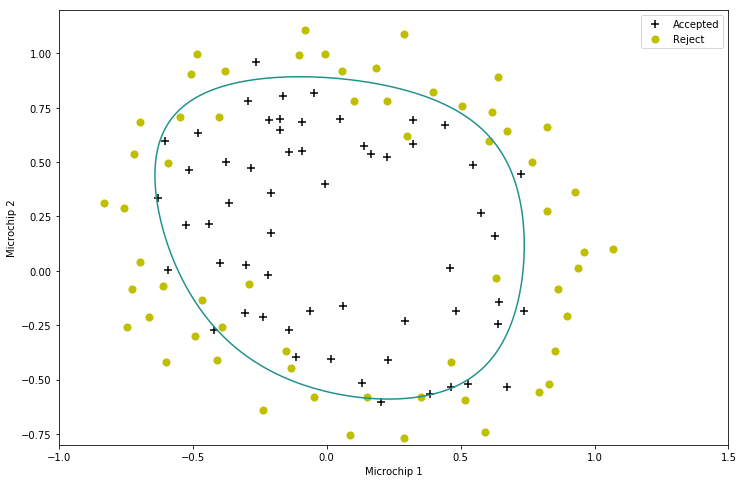

In [135]:
x = np.linspace(-1, 1.5, 250)
xx, yy = np.meshgrid(x, x)

z = feature_mapping(xx.ravel(), yy.ravel(), 6, as_ndarray = True)
z = z @ final_theta
z = z.reshape(xx.shape)

plot_data()
plt.contour(xx, yy, z, 0)
plt.ylim(-.8, 1.2)

In [79]:
a = np.array([1,2,3])          #a.shape  (3,)
b = np.array([11,22,33,44])    #b.shape  (4,)
x,y = np.meshgrid(a,b)
# 返回list,有两个元素,第一个元素是X轴的取值,第二个元素是Y轴的取值
print(x)                              #x.shape(4,3)

print(y)                             #y.shape(4,3)


[[1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]]
[[11 11 11]
 [22 22 22]
 [33 33 33]
 [44 44 44]]


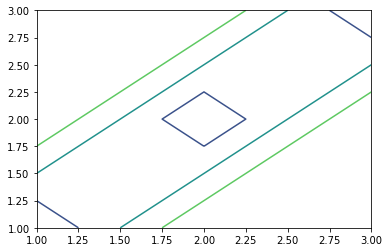

In [141]:
a = np.array([1,2,3])
z = np.array([[0,1,1],[1,0,1],[1,1,0]])
x,y = np.meshgrid(a,a)
plt.contour(x,y,z,3)          #数字3是等高线的数量

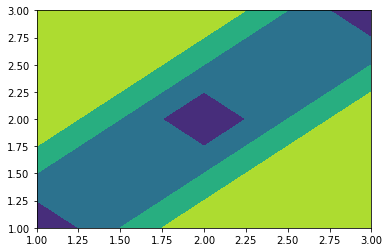

In [140]:
a = np.array([1,2,3])
z = np.array([[0,1,1],[1,0,1],[1,1,0]])
x,y = np.meshgrid(a,a)
plt.contourf(x,y,z,3)         

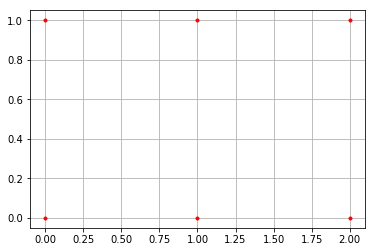

In [142]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([[0, 1, 2], [0, 1, 2]])
y = np.array([[0, 0, 0], [1, 1, 1]])


plt.plot(x, y,
         color='red',  # 全部点设置为红色
         marker='.',  # 点的形状为圆点
         linestyle='')  # 线型为空，也即点与点之间不用线连接
plt.grid(True)
plt.show()
